In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
dataset = pd.read_csv('prep.csv')

In [5]:
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.000000,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.000000,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.000000,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.000000,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.000000,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,219.000000,...,37.000000,9800.000000,4.400000,no,no,no,yes,poor,no,yes
395,51.492308,70.000000,c,0.0,2.0,normal,normal,notpresent,notpresent,220.000000,...,27.000000,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes
396,51.492308,70.000000,c,3.0,0.0,normal,normal,notpresent,notpresent,110.000000,...,26.000000,9200.000000,3.400000,yes,yes,no,poor,poor,no,yes
397,51.492308,90.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,207.000000,...,38.868902,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes


In [7]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
dataset = pd.read_csv('prep.csv')

# Separate the independent variables (features) and dependent variable (target)
# Assuming the last column is the target variable
X = dataset.iloc[:, :-1].values  # All rows and all columns except the last
y = dataset.iloc[:, -1].values   # All rows and the last column

# You can print the first few rows to verify
print("Features (X):")
print(X[:5])  # Display first 5 rows of features

print("\nTarget (y):")
print(y[:5])  # Display first 5 rows of target


Features (X):
[[2.0 76.45994832041343 'c' 3.0 0.0 'normal' 'abnormal' 'notpresent'
  'notpresent' 148.11267605633802 57.48210526315791 3.0773560209424087
  137.52875399361022 4.62724358974359 12.518155619596538
  38.86890243902439 8408.191126279864 4.705597014925374 'no' 'no' 'no'
  'yes' 'yes' 'no']
 [3.0 76.45994832041343 'c' 2.0 0.0 'normal' 'normal' 'notpresent'
  'notpresent' 148.11267605633802 22.0 0.7 137.52875399361022
  4.62724358974359 10.7 34.0 12300.0 4.705597014925374 'no' 'no' 'no'
  'yes' 'poor' 'no']
 [4.0 76.45994832041343 'a' 1.0 0.0 'normal' 'normal' 'notpresent'
  'notpresent' 99.0 23.0 0.6 138.0 4.4 12.0 34.0 8408.191126279864
  4.705597014925374 'no' 'no' 'no' 'yes' 'poor' 'no']
 [5.0 76.45994832041343 'd' 1.0 0.0 'normal' 'normal' 'notpresent'
  'notpresent' 148.11267605633802 16.0 0.7 138.0 3.2 8.1
  38.86890243902439 8408.191126279864 4.705597014925374 'no' 'no' 'no'
  'yes' 'poor' 'yes']
 [5.0 50.0 'c' 0.0 0.0 'normal' 'normal' 'notpresent' 'notpresent'
  148.

This output indicates that the dataset `prep.csv` has been successfully loaded, and the features (`X`) and target variable (`y`) have been extracted correctly. Below is the detailed explanation of the output:


**Output: Features (X)**
The first 5 rows of the features (`X`) are displayed as:


**Explanation:**

- `X` contains the feature columns from the dataset (all columns except the last one).
- Each row corresponds to a record in the dataset, and each column represents a feature.
- Some columns are numeric (e.g., 76.45994832041343), and others are categorical (e.g., 'normal', 'yes').


**Output: Target (y)**
The first 5 rows of the target variable (`y`) are displayed as:


```python
['yes' 'yes' 'yes' 'yes' 'yes']


**Explanation:**

- `y` contains the target column from the dataset (the last column).
- Each value in `y` corresponds to the target label of the respective row in `X`.
- In this case, the target labels are categorical ('yes').


## Verification of Dataset Structure

If the dataset looks correct and matches your expectations:

- **X** contains all independent variables (features).
- **y** contains the dependent variable (target).

You can now proceed with data preprocessing (e.g., handling categorical features, scaling) and applying machine learning techniques (e.g., feature selection, classification, or regression).


In [8]:

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

ValueError: could not convert string to float: 'd'

## Can You Skip Scaling and Proceed to PCA Directly?

No, scaling is essential before PCA because PCA is sensitive to the variance of features. Features with larger scales will dominate the principal components, leading to misleading results.

### Conclusion

You must handle categorical variables and scale the data before applying PCA. If you skip scaling, the PCA results will not reflect the true structure of the data. Address the error by preprocessing your categorical variables first.


The error `ValueError: could not convert string to float: 'd'` occurs because the feature scaling step (`StandardScaler`) expects all input data to be numeric. However, your dataset (`prep.csv`) includes categorical variables like 'd', 'c', 'normal', etc., which need to be handled before applying scaling.

**Here's how you can handle this issue and proceed:**


### Step 1: Handle Categorical Variables
You must encode categorical variables into numeric representations before scaling or applying PCA. There are two common approaches:

**Label Encoding:**
- Convert each unique category into an integer.
- Suitable for ordinal categorical data (e.g., levels like 'low', 'medium', 'high').


In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in categorical_columns:  # Replace `categorical_columns` with actual column indices/names
    dataset[col] = labelencoder.fit_transform(dataset[col])


NameError: name 'categorical_columns' is not defined

The error occurs because the variable `categorical_columns` is not defined in your code. You need to identify which columns in your dataset are categorical and assign their names or indices to `categorical_columns`.


In [11]:
# Step 1: Inspect the dataset

print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             399 non-null    float64
 1   bp              399 non-null    float64
 2   sg              399 non-null    object 
 3   al              399 non-null    float64
 4   su              399 non-null    float64
 5   rbc             399 non-null    object 
 6   pc              399 non-null    object 
 7   pcc             399 non-null    object 
 8   ba              399 non-null    object 
 9   bgr             399 non-null    float64
 10  bu              399 non-null    float64
 11  sc              399 non-null    float64
 12  sod             399 non-null    float64
 13  pot             399 non-null    float64
 14  hrmo            399 non-null    float64
 15  pcv             399 non-null    float64
 16  wc              399 non-null    float64
 17  rc              399 non-null    flo

In [12]:
# Step 2: Identify categorical columns

categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['sg', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')


In [14]:
# Step 3: Apply Label Encoding: Once you have identified the categorical columns, you can loop through them and apply LabelEncoder:


from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in categorical_columns:
    dataset[col] = labelencoder.fit_transform(dataset[col])

In [15]:
# Verify the transformed dataset
print(dataset.head())

   age         bp  sg   al   su  rbc  pc  pcc  ba         bgr  ...        pcv  \
0  2.0  76.459948   2  3.0  0.0    1   0    0   0  148.112676  ...  38.868902   
1  3.0  76.459948   2  2.0  0.0    1   1    0   0  148.112676  ...  34.000000   
2  4.0  76.459948   0  1.0  0.0    1   1    0   0   99.000000  ...  34.000000   
3  5.0  76.459948   3  1.0  0.0    1   1    0   0  148.112676  ...  38.868902   
4  5.0  50.000000   2  0.0  0.0    1   1    0   0  148.112676  ...  36.000000   

             wc        rc  htn  dm  cad  appet  pe  ane  classification  
0   8408.191126  4.705597    0   0    0      1   1    0               1  
1  12300.000000  4.705597    0   0    0      1   0    0               1  
2   8408.191126  4.705597    0   0    0      1   0    0               1  
3   8408.191126  4.705597    0   0    0      1   0    1               1  
4  12400.000000  4.705597    0   0    0      1   0    0               1  

[5 rows x 25 columns]


## When using PCA (Principal Component Analysis), the need for One-Hot Encoding depends on whether you have categorical features. PCA operates on numerical data, so if you have categorical features, you must encode them appropriately.

### Key Steps:

**Label Encoding:**
- If you’ve already applied Label Encoding, the categorical features are now represented as integers.
- However, these integers may imply an ordinal relationship, which is not ideal for PCA.

**One-Hot Encoding for PCA:**
- PCA is sensitive to numerical scales and relationships. Using One-Hot Encoding ensures that all categories are treated equally and avoids introducing unintended ordinal relationships.
- One-Hot Encoding will expand the dataset by creating binary columns for each category.

**Standard Scaling:**
- After One-Hot Encoding, it’s essential to standardize the data (scale it) to ensure all features, including one-hot-encoded columns, contribute equally to PCA.


## Recommended Approach:

### Step 1: One-Hot Encoding


In [16]:
# Apply One-Hot Encoding to categorical columns
dataset = pd.get_dummies(dataset, columns=categorical_columns)

# Verify the dataset after encoding
print("Dataset after One-Hot Encoding:")
print(dataset.head())


Dataset after One-Hot Encoding:
   age         bp   al   su         bgr         bu        sc         sod  \
0  2.0  76.459948  3.0  0.0  148.112676  57.482105  3.077356  137.528754   
1  3.0  76.459948  2.0  0.0  148.112676  22.000000  0.700000  137.528754   
2  4.0  76.459948  1.0  0.0   99.000000  23.000000  0.600000  138.000000   
3  5.0  76.459948  1.0  0.0  148.112676  16.000000  0.700000  138.000000   
4  5.0  50.000000  0.0  0.0  148.112676  25.000000  0.600000  137.528754   

        pot       hrmo  ...  cad_0  cad_1  appet_0  appet_1   pe_0   pe_1  \
0  4.627244  12.518156  ...   True  False    False     True  False   True   
1  4.627244  10.700000  ...   True  False    False     True   True  False   
2  4.400000  12.000000  ...   True  False    False     True   True  False   
3  3.200000   8.100000  ...   True  False    False     True   True  False   
4  4.627244  11.800000  ...   True  False    False     True   True  False   

   ane_0  ane_1  classification_0  classificatio

#### Step 2: Split Features and Target

In [17]:
# Separate features and target
X = dataset.iloc[:, :-1].values  # All rows, all columns except the target
y = dataset.iloc[:, -1].values   # All rows, only the target column


#### Step 3: Standard Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### Step 4: Apply PCA

In [19]:
from sklearn.decomposition import PCA

# Apply PCA (choose the number of components based on your requirement)
pca = PCA(n_components=2)  # Change `2` to the desired number of components
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.26989991 0.07882963]


## Summary:

- Since PCA is sensitive to numerical scales, One-Hot Encoding is recommended after Label Encoding for categorical features.
- Always scale the dataset before applying PCA.
- The output of PCA can then be used as the reduced feature set for further modeling.


## The output indicates the proportion of the dataset's variance that each principal component accounts for. Here's how to interpret the result:

### Explained Variance Ratio

**First Principal Component (PC1):** 0.26989991 (Approximately 27%)
- This means the first principal component explains about 27% of the total variance in the dataset.

**Second Principal Component (PC2):** 0.07882963 (Approximately 7.88%)
- The second principal component explains about 7.88% of the total variance.

### Cumulative Variance Explained

If you sum these two values:

0.26989991 + 0.07882963 = 0.34872954 (Approximately 34.87%)

This means the first two principal components combined explain about 34.87% of the variance in the dataset.

### What Does This Mean?

PCA has reduced the dimensionality of your dataset while retaining about 34.87% of the variance.

Depending on your use case, you might decide to:
- Increase the number of components (`n_components`) to capture more variance.
- Proceed with these two components if they provide sufficient insight or predictive power.


## Next Steps

**Step 1: Visualize the Reduced Data:**
- Plot the two principal components to see how the data clusters.


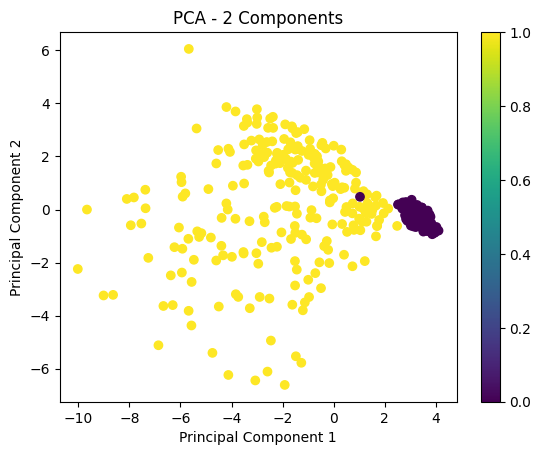

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')  # Assuming `y` is the target
plt.title('PCA - 2 Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


### Step 2: Decide on the Number of Components
Use a scree plot to determine how many components to retain for capturing sufficient variance.


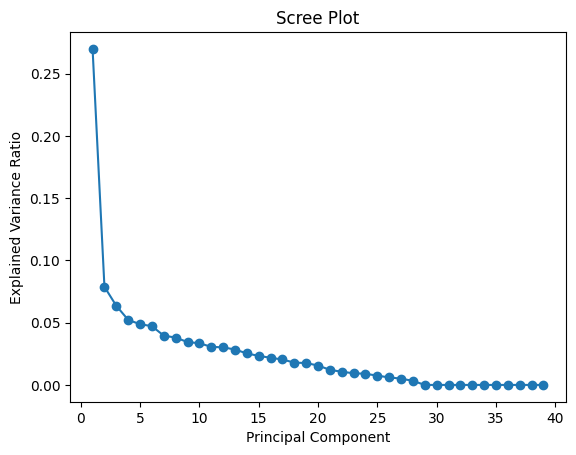

In [21]:
pca_full = PCA()
pca_full.fit(X_scaled)
explained_variance_full = pca_full.explained_variance_ratio_

plt.plot(range(1, len(explained_variance_full) + 1), explained_variance_full, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()


In [23]:
def cm_prediction(classifier,X_test):
     y_pred = classifier.predict(X_test)
        
        # Making the Confusion Matrix
     from sklearn.metrics import confusion_matrix
     cm = confusion_matrix(y_test, y_pred)
        
     from sklearn.metrics import accuracy_score 
     from sklearn.metrics import classification_report 
        #from sklearn.metrics import confusion_matrix
        #cm = confusion_matrix(y_test, y_pred)
        
     Accuracy=accuracy_score(y_test, y_pred )
        
     report=classification_report(y_test, y_pred)
     return  classifier,Accuracy,report,X_test,y_test,cm


In [24]:
def logistic(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm 

In [25]:
def svm_linear(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'linear', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [26]:
def svm_NL(X_train,y_train,X_test):
                
        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [27]:
def Navie(X_train,y_train,X_test):       
        # Fitting K-NN to the Training set
        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm   

In [28]:
def knn(X_train,y_train,X_test):
           
        # Fitting K-NN to the Training set
        from sklearn.neighbors import KNeighborsClassifier
        classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [29]:
def Decision(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm  

In [30]:
def random(X_train,y_train,X_test):
        
        # Fitting K-NN to the Training set
        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
        classifier.fit(X_train, y_train)
        classifier,Accuracy,report,X_test,y_test,cm=cm_prediction(classifier,X_test)
        return  classifier,Accuracy,report,X_test,y_test,cm

In [35]:
def pca_classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf): 
    # Create a DataFrame to store results
    dataframe = pd.DataFrame(index=['PCA'], columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])
    for number, idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex] = acclog[number]       
        dataframe['SVMl'][idex] = accsvml[number]
        dataframe['SVMnl'][idex] = accsvmnl[number]
        dataframe['KNN'][idex] = accknn[number]
        dataframe['Navie'][idex] = accnav[number]
        dataframe['Decision'][idex] = accdes[number]
        dataframe['Random'][idex] = accrf[number]
    return dataframe


In [36]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Split data (Assuming X_pca and y are already prepared)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic': LogisticRegression(),
    'SVMl': SVC(kernel='linear'),
    'SVMnl': SVC(kernel='rbf'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Navie': GaussianNB(),
    'Decision': DecisionTreeClassifier(),
    'Random': RandomForestClassifier()
}

# Evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Convert results to a DataFrame
results_df = pd.DataFrame([results], index=['PCA'])

# Display results
print("Model Performance with PCA:")
print(results_df)


Model Performance with PCA:
     Logistic    SVMl   SVMnl     KNN   Navie  Decision  Random
PCA    0.9875  0.9875  0.9875  0.9875  0.9875    0.9875  0.9875


| Model     | Logistic | SVM (Linear) | SVM (Non-linear) | KNN    | Naive Bayes | Decision Tree | Random Forest |
|-----------|----------|--------------|------------------|--------|-------------|---------------|---------------|
| **PCA**   | 0.9875   | 0.9875       | 0.9875           | 0.9875 | 0.9875      | 0.9875        | 0.9875        |


### Steps to Generate a Tabular Output of Model Performance

To get an output like this, where each algorithm's performance (accuracy or another metric) is evaluated and displayed in a tabular format, you need to follow these steps:

#### 1. **Prepare Your Data with PCA**
After applying PCA, use the reduced dataset (`X_pca`) as the input for training and testing multiple machine learning models.

#### 2. **Train Multiple Models**
Train a variety of classifiers (e.g., Logistic Regression, SVM with linear kernel, SVM with non-linear kernel, KNN, Naive Bayes, Decision Tree, and Random Forest) on the reduced dataset.

#### 3. **Evaluate Model Performance**
Calculate the accuracy (or any other metric) for each model using the reduced dataset. Save these results in a structured format, like a dictionary or DataFrame.

#### 4. **Display the Results in Tabular Format**
Use `pandas.DataFrame` to organize and display the results.


**Yes, you can adapt the same approach for PCA results as you used for the SelectKBest results. However, if the output shows the same accuracy values for all models, there might be an issue in your implementation. This could be due to:**

- **Data Issues:** If the dataset is too simple or the PCA-transformed features lack variability, the models might perform similarly.
- **Model Training:** Ensure each model is correctly configured and has the opportunity to leverage the transformed data effectively.
- **Metric Calculation:** Verify that the `accuracy_score` function is correctly applied and that the models are trained and tested on distinct sets of data.

**Here’s how you can adapt the selectk_Classification function for PCA results, ensuring it handles distinct metrics for each model:**


In [32]:
def pca_classification(acclog, accsvml, accsvmnl, accknn, accnav, accdes, accrf): 
    # Create a DataFrame to store results
    dataframe = pd.DataFrame(index=['PCA'], columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])
    for number, idex in enumerate(dataframe.index):      
        dataframe['Logistic'][idex] = acclog[number]       
        dataframe['SVMl'][idex] = accsvml[number]
        dataframe['SVMnl'][idex] = accsvmnl[number]
        dataframe['KNN'][idex] = accknn[number]
        dataframe['Navie'][idex] = accnav[number]
        dataframe['Decision'][idex] = accdes[number]
        dataframe['Random'][idex] = accrf[number]
    return dataframe


## Debugging the Identical Accuracy Issue

**Check the following in your PCA-based evaluation process:**

### PCA Variance Check


In [34]:
print("Explained Variance Ratio:", explained_variance)


Explained Variance Ratio: [0.26989991 0.07882963]


**The output Explained Variance Ratio:** [0.26989991, 0.07882963] indicates that the two principal components (selected via PCA(n_components=2)) explain about 26.99% and 7.88% of the total variance in the dataset, respectively. This totals approximately 34.87% of the variance explained by these two components.

### Interpretation

#### Low Variance Explained:
The two selected principal components account for only a small portion of the dataset's total variability. This might mean that the dataset is complex, and reducing it to two dimensions has discarded much of the information.

#### Impact on Model Accuracy:
If the PCA transformation loses significant variance, models trained on these reduced features may perform similarly due to the limited differentiation among the features.


## Next Steps to Address the Identical Accuracy Issue

### Increase the Number of Components
Try increasing the `n_components` parameter to retain more variance.


In [37]:
pca = PCA(n_components=10)  # Adjust based on the dataset
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Cumulative Variance Explained:", sum(explained_variance))


Explained Variance Ratio: [0.26989991 0.07882963 0.06354765 0.05226852 0.04876083 0.04721816
 0.03955962 0.03803946 0.03443435 0.03350824]
Cumulative Variance Explained: 0.7060663633495166


## The output shows the explained variance ratio for the first 10 principal components after applying PCA on your dataset, and the cumulative variance explained by these components.

### Interpretation:

**Explained Variance Ratio:**
- The individual components explain varying amounts of the total variance in the dataset:
  - Component 1 explains 26.99% of the variance.
  - Component 2 explains 7.88%, and so on.
- The total explained variance for these 10 components is relatively high, summing to about 70.61%. This means that with just these 10 components, you're capturing over 70% of the original dataset's variability.

**Cumulative Variance Explained:**
- Cumulative Variance indicates how much of the total variance is explained by all the selected components.
- In this case, the first 10 components together explain 70.61% of the variance in the data.
- This is a significant portion, and usually, if we explain around 70%-90% of the total variance, it's considered a good reduction.

### Next Steps:

**Feature Reduction and Model Training:**
- Given that you have reduced the dataset to just 10 components, you can now proceed with model training using the `X_pca` data. This should help your models focus on the most important features while reducing noise.
- Train the models (e.g., Logistic Regression, SVM, Random Forest) on the `X_pca` dataset to see if the performance improves compared to the original dataset.

**Explaining More Variance:**
- If you'd like to explain even more variance, you can try increasing the number of components (`n_components`) until you achieve a satisfactory level of explained variance (typically 80%-90%).


In [38]:
pca = PCA(n_components=15)  # Increase the number of components
X_pca = pca.fit_transform(X_scaled)


## Visualize Explained Variance

It might be helpful to plot the explained variance ratio of each component to visually inspect how much each component contributes.


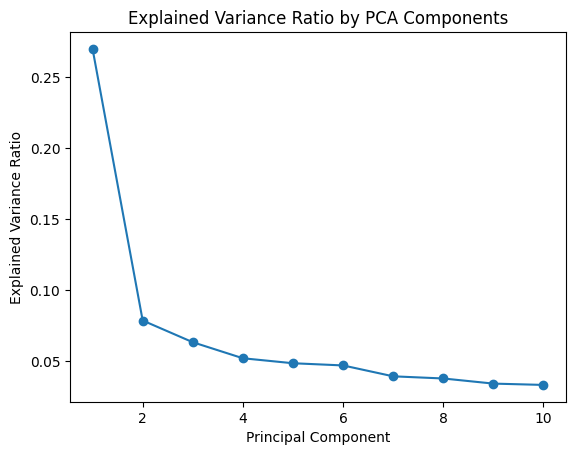

In [39]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11), explained_variance, marker='o')
plt.title("Explained Variance Ratio by PCA Components")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()
